In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.ticker import MaxNLocator, ScalarFormatter
from matplotlib import gridspec
import pickle
import os,sys
import corner
from scipy.stats import binned_statistic
import openpyxl
from pathlib import Path

# Important functions and variables

In [2]:
def phasefoldtime(datax):
    Tc = 2457063.2096
    T_c_JD = Tc - 2400000.5
    P = 0.7365474
    phasefoldx = ((datax - T_c_JD)/P) % 1
    previousphasefoldx = phasefoldx - 1
    return phasefoldx, previousphasefoldx

def newimport(planet, method):
    with open('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/'+method+'/Bestfit_BLISS_v1,psfw.pkl', 'rb') as f:
        data=pickle.load(f)
    return data

def Bindata(data, size):
    data = np.ma.masked_invalid(np.ma.copy(data))
    x = np.arange(data.shape[0])
    bins = size*np.arange(np.ceil(len(x)/size)+1)-0.5
    
    binned_data = binned_statistic(x, data, statistic=np.ma.median, bins=bins)[0]
    binned_data_std = binned_statistic(x, data, statistic=np.ma.std, bins=bins)[0]
    return binned_data, binned_data_std

# 0656 -> #FF0202
# 2448 -> #FF6464
# 2704 -> #FF9595
# 2960 -> #FFC2C2

# 0144 -> #0400FF
# 3216 -> #5654FF
# 3472 -> #8280FE
# 3728 -> #B6B5FF
colors = ['#0400FF', '#5654FF', '#FF0202', '#8280FE', '#FF6464', '#FF9595', '#FFC2C2', '#B6B5FF']
Demory_color = '#443C39'

# Make the 55 cnc big data set

In [35]:
mode = 'full'
def extract(planet, method):
    if mode =='full':
        temp1 = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_full_AORs4807.dat')
    else:
        temp1 = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_binned_AORs4807.dat')
    if method == 'full':
        flux = temp1[:,0]
        time = temp1[:,1]
        xcent = temp1[:,2]
        ycent = temp1[:,3]
        xpsf = temp1[:,4]
        ypsf = temp1[:,5]
        bg = temp1[:,6]
        NPP = temp1[:,7]
        return flux, time, xcent, ycent, xpsf, ypsf, bg, NPP
    else:
        flux = temp1[:,0]
        fluxstd = temp1[:,1]
        time = temp1[:,2]
        timestd = temp1[:,3]
        xcent = temp1[:,4]
        xcentstd = temp1[:,5]
        ycent = temp1[:,6]
        ycentstd = temp1[:,7]
        xpsf = temp1[:,8]
        xpsfstd = temp1[:,9]
        ypsf = temp1[:,10]
        ypsfstd = temp1[:,11]
        bg = temp1[:,12]
        bgstd = temp1[:,13]
        NPP = temp1[:,14]
        NPPstd = temp1[:,15]
    return flux, fluxstd, time, timestd, xcent, xcentstd, ycent, ycentstd, xpsf, xpsfstd, ypsf, ypsfstd, bg, bgstd, NPP, NPPstd

def assemble(method):
    planets = ['55cnc0144', '55cnc3216', '55cnc0656', '55cnc3472', '55cnc2448', '55cnc2704', '55cnc2960', '55cnc3728']
    if method == 'full':
        L1=[]
        L2=[]
        L3=[]
        L4=[]
        L5=[]
        L6=[]
        L7=[]
        L8=[]
    else:
        L1=[]
        L2=[]
        L3=[]
        L4=[]
        L5=[]
        L6=[]
        L7=[]
        L8=[]
        L9=[]
        L10=[]
        L11=[]
        L12=[]
        L13=[]
        L14=[]
        L15=[]
        L16=[]
    for planet in planets:
        data = extract(planet, method)
        if method == 'full':
            L1.extend(data[0])
            L2.extend(data[1])
            L3.extend(data[2])
            L4.extend(data[3])
            L5.extend(data[4])
            L6.extend(data[5])
            L7.extend(data[6])
            L8.extend(data[7])
        else:
            L1.extend(data[0])
            L2.extend(data[1])
            L3.extend(data[2])
            L4.extend(data[3])
            L5.extend(data[4])
            L6.extend(data[5])
            L7.extend(data[6])
            L8.extend(data[7])
            L9.extend(data[8])
            L10.extend(data[9])
            L11.extend(data[10])
            L12.extend(data[11])
            L13.extend(data[12])
            L14.extend(data[13])
            L15.extend(data[14])
            L16.extend(data[15])
    if method =='full':
        L = np.zeros([4761600,8])
        L[:,0]=L1
        L[:,1]=L2
        L[:,2]=L3
        L[:,3]=L4
        L[:,4]=L5
        L[:,5]=L6
        L[:,6]=L7
        L[:,7]=L8
    else:
        L = np.zeros([7440,16])
        L[:,0]=L1
        L[:,1]=L2
        L[:,2]=L3
        L[:,3]=L4
        L[:,4]=L5
        L[:,5]=L6
        L[:,6]=L7
        L[:,7]=L8
        L[:,8]=L9
        L[:,9]=L10
        L[:,10]=L11
        L[:,11]=L12
        L[:,12]=L13
        L[:,13]=L14
        L[:,14]=L15
        L[:,15]=L16
    return L
 
if mode == 'full':
    BIN_head = 'Flux, Time, x-centroid, y-centroid, x-PSF width, y-PSF width, bg flux, Noise Pixel Parameter'
    savepath_tmp = '/Users/samsonmercier/Desktop/Research/55cnc_Nobug/4umExactCircular2_2_movingCentroid/ch2_datacube_full_AORs4807.dat'
else:
    BIN_head = 'Flux, Flux std, Time, Time std, x-centroid, x-centroid std, y-centroid, y-centroid std, x-PSF width, x-PSF width std, y-PSF width, y-PSF width std, bg flux, bg flux std, Noise Pixel Parameter, Noise Pixel Parameter std'
    savepath_tmp = '/Users/samsonmercier/Desktop/Research/55cnc_Nobug/4umExactCircular2_2_movingCentroid/ch2_datacube_binned_AORs4807.dat'

data_big = assemble(mode)
np.savetxt(savepath_tmp, data_big, header = BIN_head)

# Key Plot 1&2 - Centroid Position and Phase-folded Raw Photometry

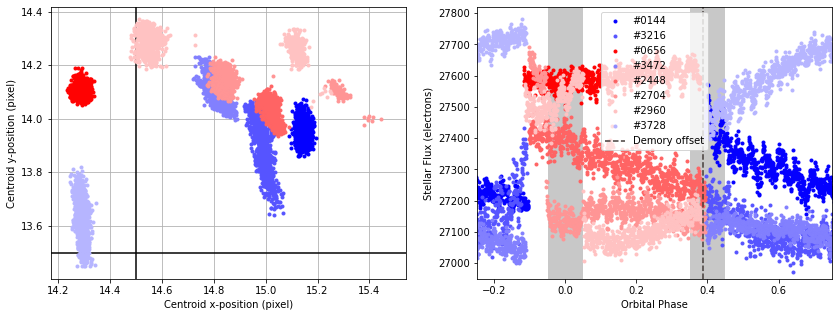

In [163]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
def extract_centroid(planet, method):
    if method == 'full':
        data = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_full_AORs4807.dat')
        xcent = data[:,2]
        ycent = data[:,3]
    else: 
        data = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_binned_AORs4807.dat')
        xcent = data[:,4]
        ycent = data[:,6]
    return xcent, ycent

def extract_photometry(planet, method):
    if method == 'full':
        data = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_full_AORs4807.dat')
        flux = data[:,0]
        time = data[:,1]
    else: 
        data = np.loadtxt('/Users/samsonmercier/Desktop/Research/'+planet+'/4umExactCircular2_2_movingCentroid/ch2_datacube_binned_AORs4807.dat')
        flux = data[:,0]
        time = data[:,2]
    return time, flux

planets = ['55cnc0144', '55cnc3216', '55cnc0656', '55cnc3472', '55cnc2448', '55cnc2704', '55cnc2960', '55cnc3728']
planets_id = ['#0144', '#3216', '#0656', '#3472', '#2448', '#2704', '#2960', '#3728']
Demory_offset = -41
P = 0.7365474

ax2.axhspan(26000, 27900, -0.05+0.25, 0.05+0.25, facecolor='#C8C8C8')
ax2.axhspan(26000, 27900, 0.35+0.25, 0.45+0.25, facecolor='#C8C8C8')
ax1.axvline(14.5, color='black', linewidth=1.5)
ax1.hlines(y=13.50, xmin=14.0, xmax=15.6, linewidth=1.5, color='black')

for i, planet in enumerate(planets):
    xc, yc = extract_centroid(planet, 'binned')
    t, f = extract_photometry(planet, 'binned')
    ax1.plot(xc, yc, '.', color=colors[i])
    ax2.plot(phasefoldtime(t)[0], f, '.', color=colors[i], label=planets_id[i])
    ax2.plot(phasefoldtime(t)[1], f, '.', color=colors[i])
ax2.set_xlim(-0.25, 0.75)
ax2.set_ylim(26950, 27820)
ax1.set_xlim(14.17, 15.54)

ax2.axvline(0.5+(Demory_offset/360), linestyle='--', color=Demory_color, label='Demory offset')
ax2.set_ylabel('Stellar Flux (electrons)')
ax2.set_xlabel('Orbital Phase')
ax1.set_xlabel('Centroid x-position (pixel)')
ax1.set_ylabel('Centroid y-position (pixel)')
ax2.legend()
ax1.grid()
plt.show()

# Download Demory model

In [3]:
file = Path('/Users/samsonmercier/Desktop/Research', 'Demory.xlsx')
obj = openpyxl.load_workbook(file)

sheet = obj.active

Demory_phase = []
Demory_model = []
Demory_flux = []
for row in sheet.iter_rows(1, sheet.max_row):
    Demory_phase.append(row[0].value)
    Demory_model.append(row[2].value)
    Demory_flux.append(row[1].value)
Demory_phase_first = Demory_phase[1:]
Demory_phase_last = [Demory_phase_first[i]-1 for i in range(len(Demory_phase_first))]
Demory_model = Demory_model[1:]
Demory_model = [Demory_model[i]*1e6 for i in range(len(Demory_model))]
Demory_flux = Demory_flux[1:]

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Key Plot 3&4 - Orbital phase curve and residuals

In [34]:
datamult = newimport('55cnc_Nobug', 'BLISS_v1,psfw')

actualflux = datamult[2]/datamult[4]
actualtime = datamult[1]
actualresiduals = actualflux - datamult[3]

Binfactor = 75

binned_flux = Bindata(actualflux, Binfactor)[0]*1e6
binned_time = Bindata(actualtime, Binfactor)[0]
binned_residuals = Bindata(actualresiduals, Binfactor)[0]*1e6
binned_flux_std = Bindata(actualflux, Binfactor)[1]*1e6/np.sqrt(Binfactor)

morebinned_flux = Bindata(actualflux, Binfactor*2)[0]
morebinned_time = Bindata(actualtime, Binfactor*2)[0]

AOR1f=[]
AOR1t=[]
AOR1r=[]
AOR1er=[]

AOR2f=[]
AOR2t=[]
AOR2r=[]
AOR2er=[]

AOR3f=[]
AOR3t=[]
AOR3r=[]
AOR3er=[]

AOR4f=[]
AOR4t=[]
AOR4r=[]
AOR4er=[]

AOR5f=[]
AOR5t=[]
AOR5r=[]
AOR5er=[]

AOR6f=[]
AOR6t=[]
AOR6r=[]
AOR6er=[]

AOR7f=[]
AOR7t=[]
AOR7r=[]
AOR7er=[]

AOR8f=[]
AOR8t=[]
AOR8r=[]
AOR8er=[]

for i in range(len(binned_flux)):
    if binned_time[i] < 56460:
        AOR1f.append(binned_flux[i])
        AOR1t.append(binned_time[i])
        AOR1r.append(binned_residuals[i])
        AOR1er.append(binned_flux_std[i])
    elif 56460 < binned_time[i] < 56463 : 
        AOR2f.append(binned_flux[i])
        AOR2t.append(binned_time[i])
        AOR2r.append(binned_residuals[i])
        AOR2er.append(binned_flux_std[i])
    elif 56464 < binned_time[i] < 56466 : 
        AOR3f.append(binned_flux[i])
        AOR3t.append(binned_time[i])
        AOR3r.append(binned_residuals[i])
        AOR3er.append(binned_flux_std[i])
    elif 56470 < binned_time[i] < 56475 : 
        AOR4f.append(binned_flux[i])
        AOR4t.append(binned_time[i])
        AOR4r.append(binned_residuals[i])
        AOR4er.append(binned_flux_std[i])
    elif 56475 < binned_time[i] < 56480 : 
        AOR5f.append(binned_flux[i])
        AOR5t.append(binned_time[i])
        AOR5r.append(binned_residuals[i])
        AOR5er.append(binned_flux_std[i])
    elif 56480 < binned_time[i] < 56484 : 
        AOR6f.append(binned_flux[i])
        AOR6t.append(binned_time[i])
        AOR6r.append(binned_residuals[i])
        AOR6er.append(binned_flux_std[i])
    elif 56484 <= binned_time[i] < 56487 : 
        AOR7f.append(binned_flux[i])
        AOR7t.append(binned_time[i])
        AOR7r.append(binned_residuals[i])
        AOR7er.append(binned_flux_std[i])
    elif 56488 < binned_time[i] < 56492 : 
        AOR8f.append(binned_flux[i])
        AOR8t.append(binned_time[i])
        AOR8r.append(binned_residuals[i])
        AOR8er.append(binned_flux_std[i])

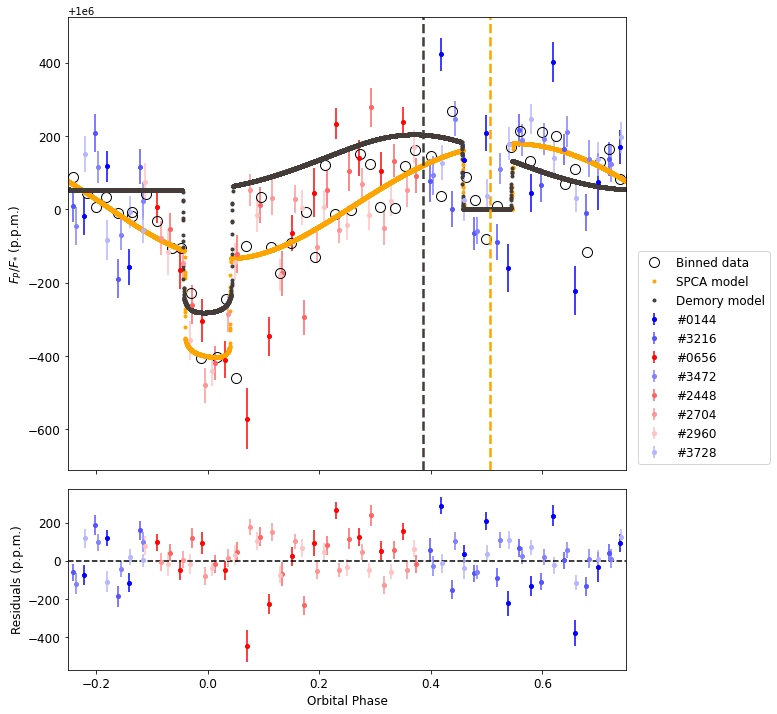

In [35]:
Demory_offset = -41
SPCA_offset = 2

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 12), gridspec_kw={'height_ratios': [2.5, 1]})

ax1.plot(phasefoldtime(np.array(morebinned_time))[0], morebinned_flux*1e6, 'o', color='black', mfc = 'none', markersize=10, label='Binned data')
ax1.plot(phasefoldtime(np.array(morebinned_time))[1], morebinned_flux*1e6, 'o', color='black', mfc='none', markersize=10)

ax1.errorbar(phasefoldtime(np.array(AOR1t))[0], AOR1f, yerr = AOR1er, xerr = None, fmt = '.', color = colors[0], markersize=8,label='#0144')
ax1.errorbar(phasefoldtime(np.array(AOR1t))[1], AOR1f, yerr = AOR1er, xerr = None, fmt = '.', color = colors[0], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR2t))[0], AOR2f, yerr = AOR2er, xerr = None, fmt = '.', color = colors[1], markersize=8,label='#3216')
ax1.errorbar(phasefoldtime(np.array(AOR2t))[1], AOR2f, yerr = AOR2er, xerr = None, fmt = '.', color = colors[1], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR3t))[0], AOR3f, yerr = AOR3er, xerr = None, fmt = '.', color = colors[2], label='#0656', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR3t))[1], AOR3f, yerr = AOR3er, xerr = None, fmt = '.', color = colors[2], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR4t))[0], AOR4f, yerr = AOR4er, xerr = None, fmt = '.', color = colors[3], label='#3472', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR4t))[1], AOR4f, yerr = AOR4er, xerr = None, fmt = '.', color = colors[3], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR5t))[0], AOR5f, yerr = AOR5er, xerr = None, fmt = '.', color = colors[4], label='#2448', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR5t))[1], AOR5f, yerr = AOR5er, xerr = None, fmt = '.', color = colors[4], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR6t))[0], AOR6f, yerr = AOR6er, xerr = None, fmt = '.', color = colors[5], label='#2704', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR6t))[1], AOR6f, yerr = AOR6er, xerr = None, fmt = '.', color = colors[5], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR7t))[0], AOR7f, yerr = AOR7er, xerr = None, fmt = '.', color = colors[6], label='#2960', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR7t))[1], AOR7f, yerr = AOR7er, xerr = None, fmt = '.', color = colors[6], markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR8t))[0], AOR8f, yerr = AOR8er, xerr = None, fmt = '.', color = colors[7], label='#3728', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR8t))[1], AOR8f, yerr = AOR8er, xerr = None, fmt = '.', color = colors[7], markersize=8)

ax1.plot(phasefoldtime(actualtime)[0], datamult[3]*1e6, '.', color='orange', label='SPCA model')
ax1.plot(phasefoldtime(actualtime)[1], datamult[3]*1e6, '.', color='orange')

ax1.plot(Demory_phase_first, Demory_model, '.', color = Demory_color, label='Demory model')
ax1.plot(Demory_phase_last, Demory_model, '.', color = Demory_color)

ax1.legend(bbox_to_anchor=(1.01, 0), loc='lower left', fontsize=12)
ax1.set_ylabel('$F_P / F_{*}$ (p.p.m.)', fontsize=12)
ax1.set_xlim(-0.25, 0.75)
ax1.axvline(0.5+(Demory_offset/360), 0, 1, linestyle='--', color=Demory_color, label='Demory offset', linewidth=2.5)
ax1.axvline(0.5+(SPCA_offset/360), 0, 1, linestyle='--', color='orange', label='SPCA offset', linewidth=2.5)
ax1.tick_params(axis='y', labelsize=12)


ax2.errorbar(phasefoldtime(np.array(AOR1t))[0], AOR1r, yerr = AOR1er, xerr = None, fmt = '.', color = colors[0], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR1t))[1], AOR1r, yerr = AOR1er, xerr = None, fmt = '.', color = colors[0], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR2t))[0], AOR2r, yerr = AOR2er, xerr = None, fmt = '.', color = colors[1], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR2t))[1], AOR2r, yerr = AOR2er, xerr = None, fmt = '.', color = colors[1], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR3t))[0], AOR3r, yerr = AOR3er, xerr = None, fmt = '.', color = colors[2], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR3t))[1], AOR3r, yerr = AOR3er, xerr = None, fmt = '.', color = colors[2], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR4t))[0], AOR4r, yerr = AOR4er, xerr = None, fmt = '.', color = colors[3], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR4t))[1], AOR4r, yerr = AOR4er, xerr = None, fmt = '.', color = colors[3], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR5t))[0], AOR5r, yerr = AOR5er, xerr = None, fmt = '.', color = colors[4], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR5t))[1], AOR5r, yerr = AOR5er, xerr = None, fmt = '.', color = colors[4], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR6t))[0], AOR6r, yerr = AOR6er, xerr = None, fmt = '.', color = colors[5], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR6t))[1], AOR6r, yerr = AOR6er, xerr = None, fmt = '.', color = colors[5], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR7t))[0], AOR7r, yerr = AOR7er, xerr = None, fmt = '.', color = colors[6], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR7t))[1], AOR7r, yerr = AOR7er, xerr = None, fmt = '.', color = colors[6], markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR8t))[0], AOR8r, yerr = AOR8er, xerr = None, fmt = '.', color = colors[7], markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR8t))[1], AOR8r, yerr = AOR8er, xerr = None, fmt = '.', color = colors[7], markersize=8)

ax2.axhline(y = 0, color='black', linestyle = '--')

ax2.set_xlabel('Orbital Phase', fontsize=12)
ax2.set_ylabel('Residuals (p.p.m.)', fontsize=12)
ax2.set_xlim(-0.25, 0.75)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)

plt.subplots_adjust(hspace=0.06)

plt.savefig('/Users/samsonmercier/Desktop/Check_Phase.pdf')

# Key Plot 3 & 4 bis

In [61]:
datamult = newimport('55cnc_Nobug', 'BLISS_v1,psfw_BEST_BEST_PRIORS')

actualflux = datamult[2]/datamult[4]
actualtime = datamult[1]
actualresiduals = actualflux - datamult[3]

Binfactor = 75

binned_flux = Bindata(actualflux, 250)[0]*1e6
binned_time = Bindata(actualtime, 250)[0]
binned_residuals = Bindata(actualresiduals, 250)[0]*1e6
binned_flux_std = Bindata(actualflux, 250)[1]*1e6/np.sqrt(250)

otherbinned_flux = Bindata(actualflux, Binfactor)[0]*1e6
otherbinned_time = Bindata(actualtime, Binfactor)[0]
otherbinned_residuals = Bindata(actualresiduals, Binfactor)[0]*1e6
otherbinned_flux_std = Bindata(actualflux, Binfactor)[1]*1e6/np.sqrt(Binfactor)


AOR1f=[]
AOR1t=[]
AOR1r=[]
AOR1er=[]

AOR1f3=[]
AOR1t3=[]
AOR1r3=[]
AOR1er3=[]

AOR2f=[]
AOR2t=[]
AOR2r=[]
AOR2er=[]

AOR2f3=[]
AOR2t3=[]
AOR2r3=[]
AOR2er3=[]

AOR3f=[]
AOR3t=[]
AOR3r=[]
AOR3er=[]

AOR3f3=[]
AOR3t3=[]
AOR3r3=[]
AOR3er3=[]

AOR4f=[]
AOR4t=[]
AOR4r=[]
AOR4er=[]

AOR4f3=[]
AOR4t3=[]
AOR4r3=[]
AOR4er3=[]

AOR5f=[]
AOR5t=[]
AOR5r=[]
AOR5er=[]

AOR5f3=[]
AOR5t3=[]
AOR5r3=[]
AOR5er3=[]

AOR6f=[]
AOR6t=[]
AOR6r=[]
AOR6er=[]

AOR6f3=[]
AOR6t3=[]
AOR6r3=[]
AOR6er3=[]

AOR7f=[]
AOR7t=[]
AOR7r=[]
AOR7er=[]

AOR7f3=[]
AOR7t3=[]
AOR7r3=[]
AOR7er3=[]

AOR8f=[]
AOR8t=[]
AOR8r=[]
AOR8er=[]

AOR8f3=[]
AOR8t3=[]
AOR8r3=[]
AOR8er3=[]

for i in range(len(binned_flux)):
    if binned_time[i] < 56460:
        AOR1f.append(binned_flux[i])
        AOR1t.append(binned_time[i])
        AOR1r.append(binned_residuals[i])
        AOR1er.append(binned_flux_std[i])
    elif 56460 < binned_time[i] < 56463 : 
        AOR2f.append(binned_flux[i])
        AOR2t.append(binned_time[i])
        AOR2r.append(binned_residuals[i])
        AOR2er.append(binned_flux_std[i])
    elif 56464 < binned_time[i] < 56466 : 
        AOR3f.append(binned_flux[i])
        AOR3t.append(binned_time[i])
        AOR3r.append(binned_residuals[i])
        AOR3er.append(binned_flux_std[i])
    elif 56470 < binned_time[i] < 56475 : 
        AOR4f.append(binned_flux[i])
        AOR4t.append(binned_time[i])
        AOR4r.append(binned_residuals[i])
        AOR4er.append(binned_flux_std[i])
    elif 56475 < binned_time[i] < 56480 : 
        AOR5f.append(binned_flux[i])
        AOR5t.append(binned_time[i])
        AOR5r.append(binned_residuals[i])
        AOR5er.append(binned_flux_std[i])
    elif 56480 < binned_time[i] < 56484 : 
        AOR6f.append(binned_flux[i])
        AOR6t.append(binned_time[i])
        AOR6r.append(binned_residuals[i])
        AOR6er.append(binned_flux_std[i])
    elif 56484 <= binned_time[i] < 56487 : 
        AOR7f.append(binned_flux[i])
        AOR7t.append(binned_time[i])
        AOR7r.append(binned_residuals[i])
        AOR7er.append(binned_flux_std[i])
    elif 56488 < binned_time[i] < 56492 : 
        AOR8f.append(binned_flux[i])
        AOR8t.append(binned_time[i])
        AOR8r.append(binned_residuals[i])
        AOR8er.append(binned_flux_std[i])
        
for i in range(len(otherbinned_flux)):
    if otherbinned_time[i] < 56460:
        AOR1f3.append(otherbinned_flux[i])
        AOR1t3.append(otherbinned_time[i])
        AOR1r3.append(otherbinned_residuals[i])
        AOR1er3.append(otherbinned_flux_std[i])
    elif 56460 < otherbinned_time[i] < 56463 : 
        AOR2f3.append(otherbinned_flux[i])
        AOR2t3.append(otherbinned_time[i])
        AOR2r3.append(otherbinned_residuals[i])
        AOR2er3.append(otherbinned_flux_std[i])
    elif 56464 < otherbinned_time[i] < 56466 : 
        AOR3f3.append(otherbinned_flux[i])
        AOR3t3.append(otherbinned_time[i])
        AOR3r3.append(otherbinned_residuals[i])
        AOR3er3.append(otherbinned_flux_std[i])
    elif 56470 < otherbinned_time[i] < 56475 : 
        AOR4f3.append(otherbinned_flux[i])
        AOR4t3.append(otherbinned_time[i])
        AOR4r3.append(otherbinned_residuals[i])
        AOR4er3.append(otherbinned_flux_std[i])
    elif 56475 < otherbinned_time[i] < 56480 : 
        AOR5f3.append(otherbinned_flux[i])
        AOR5t3.append(otherbinned_time[i])
        AOR5r3.append(otherbinned_residuals[i])
        AOR5er3.append(otherbinned_flux_std[i])
    elif 56480 < otherbinned_time[i] < 56484 : 
        AOR6f3.append(otherbinned_flux[i])
        AOR6t3.append(otherbinned_time[i])
        AOR6r3.append(otherbinned_residuals[i])
        AOR6er3.append(otherbinned_flux_std[i])
    elif 56484 <= otherbinned_time[i] < 56487 : 
        AOR7f3.append(otherbinned_flux[i])
        AOR7t3.append(otherbinned_time[i])
        AOR7r3.append(otherbinned_residuals[i])
        AOR7er3.append(otherbinned_flux_std[i])
    elif 56488 < otherbinned_time[i] < 56492 : 
        AOR8f3.append(otherbinned_flux[i])
        AOR8t3.append(otherbinned_time[i])
        AOR8r3.append(otherbinned_residuals[i])
        AOR8er3.append(otherbinned_flux_std[i])

In [62]:
datamult_2 = newimport('55cnc_Nobug', 'BLISS_v1,psfw_NO_CHECK_PHASE_2')

actualflux_2 = datamult_2[2]/datamult_2[4]
actualtime_2 = datamult_2[1]
actualresiduals_2 = actualflux_2 - datamult_2[3]

Binfactor = 75

binned_flux_2 = Bindata(actualflux_2, Binfactor)[0]*1e6
binned_time_2 = Bindata(actualtime_2, Binfactor)[0]
binned_residuals_2 = Bindata(actualresiduals_2, Binfactor)[0]*1e6
binned_flux_std_2 = Bindata(actualflux_2, Binfactor)[1]*1e6/np.sqrt(Binfactor)

morebinned_flux_2 = Bindata(actualflux_2, Binfactor*2)[0]
morebinned_time_2 = Bindata(actualtime_2, Binfactor*2)[0]
morebinned_flux_std_2 = Bindata(actualflux_2, Binfactor*2)[1]*1e6/np.sqrt(Binfactor*2)

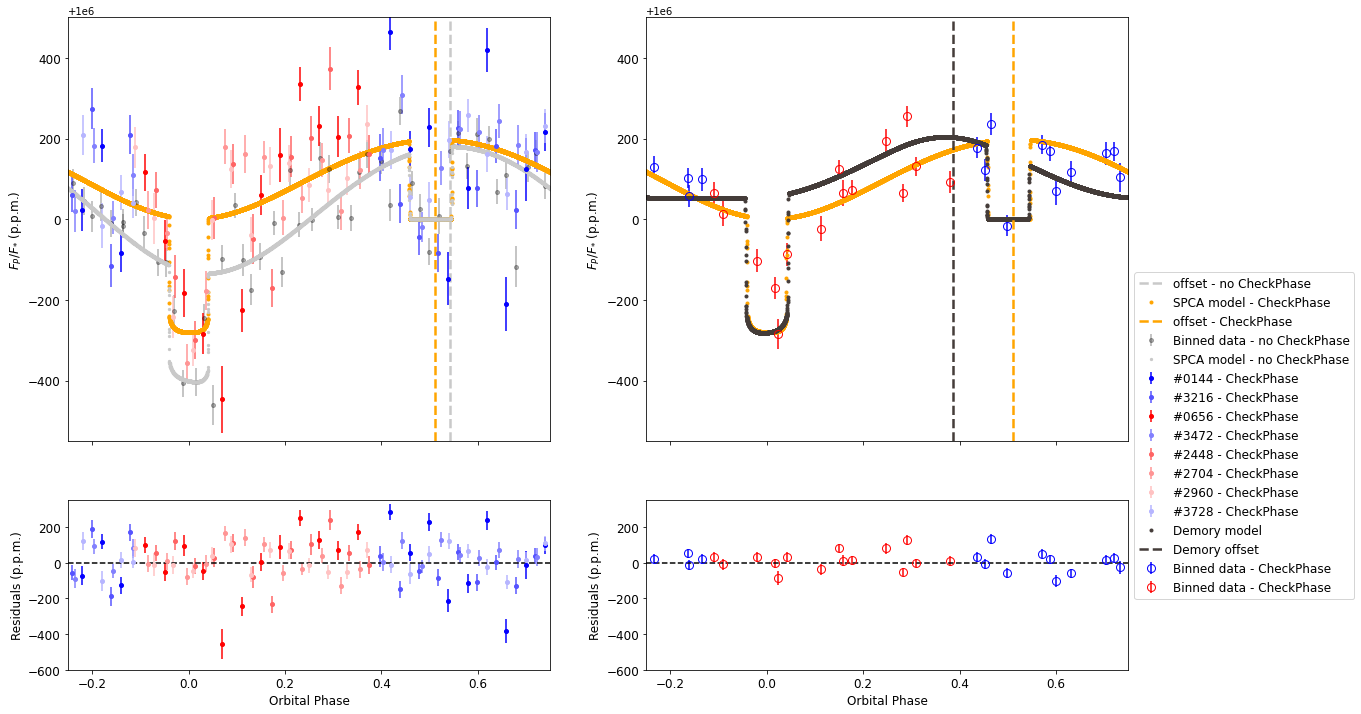

In [63]:
Demory_offset = -41
SPCA_offset = 4.144144144144134
SPCA_offset_2 = 15.675675675675652

f, ((ax3, ax1), (ax4, ax2)) = plt.subplots(2, 2, sharex=True, figsize=(19, 12), gridspec_kw={'height_ratios': [2.5, 1]})

ax1.errorbar(phasefoldtime(np.array(AOR1t))[0], AOR1f, yerr = AOR1er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8,label='Binned data - CheckPhase')
ax1.errorbar(phasefoldtime(np.array(AOR1t))[1], AOR1f, yerr = AOR1er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR2t))[0], AOR2f, yerr = AOR2er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR2t))[1], AOR2f, yerr = AOR2er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR3t))[0], AOR3f, yerr = AOR3er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR3t))[1], AOR3f, yerr = AOR3er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR4t))[0], AOR4f, yerr = AOR4er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR4t))[1], AOR4f, yerr = AOR4er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR5t))[0], AOR5f, yerr = AOR5er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR5t))[1], AOR5f, yerr = AOR5er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR6t))[0], AOR6f, yerr = AOR6er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR6t))[1], AOR6f, yerr = AOR6er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR7t))[0], AOR7f, yerr = AOR7er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', label='Binned data - CheckPhase', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR7t))[1], AOR7f, yerr = AOR7er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax1.errorbar(phasefoldtime(np.array(AOR8t))[0], AOR8f, yerr = AOR8er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax1.errorbar(phasefoldtime(np.array(AOR8t))[1], AOR8f, yerr = AOR8er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax1.plot(phasefoldtime(actualtime)[0], datamult[3]*1e6, '.', color='orange')
ax1.plot(phasefoldtime(actualtime)[1], datamult[3]*1e6, '.', color='orange')

ax1.plot(Demory_phase_first, Demory_model, '.', color = Demory_color, label='Demory model')
ax1.plot(Demory_phase_last, Demory_model, '.', color = Demory_color)

ax1.set_ylabel('$F_P / F_{*}$ (p.p.m.)', fontsize=12)
ax1.set_ylim(1e6-550, 1e6+500)
ax1.set_xlim(-0.25, 0.75)
ax1.axvline(0.5+(Demory_offset/360), 0, 1, linestyle='--', color=Demory_color, label='Demory offset', linewidth=2.5)
ax1.axvline(0.5+(SPCA_offset/360), 0, 1, linestyle='--', color='orange', linewidth=2.5)
ax1.tick_params(axis='y', labelsize=12)


ax2.errorbar(phasefoldtime(np.array(AOR1t))[0], AOR1r, yerr = AOR1er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR1t))[1], AOR1r, yerr = AOR1er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR2t))[0], AOR2r, yerr = AOR2er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR2t))[1], AOR2r, yerr = AOR2er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR3t))[0], AOR3r, yerr = AOR3er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR3t))[1], AOR3r, yerr = AOR3er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR4t))[0], AOR4r, yerr = AOR4er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR4t))[1], AOR4r, yerr = AOR4er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR5t))[0], AOR5r, yerr = AOR5er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR5t))[1], AOR5r, yerr = AOR5er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR6t))[0], AOR6r, yerr = AOR6er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR6t))[1], AOR6r, yerr = AOR6er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR7t))[0], AOR7r, yerr = AOR7er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR7t))[1], AOR7r, yerr = AOR7er, xerr = None, fmt = 'o', color = colors[2], mfc = 'none', markersize=8)

ax2.errorbar(phasefoldtime(np.array(AOR8t))[0], AOR8r, yerr = AOR8er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)
ax2.errorbar(phasefoldtime(np.array(AOR8t))[1], AOR8r, yerr = AOR8er, xerr = None, fmt = 'o', color = colors[0], mfc = 'none', markersize=8)

ax2.axhline(y = 0, color='black', linestyle = '--')
ax2.set_xlabel('Orbital Phase', fontsize=12)
ax2.set_ylabel('Residuals (p.p.m.)', fontsize=12)
ax2.set_xlim(-0.25, 0.75)
ax2.set_ylim(-600, 350)
ax2.tick_params(axis='y', labelsize=12)
ax2.tick_params(axis='x', labelsize=12)

ax3.axvline(0.5+(SPCA_offset_2/360), 0, 1, linestyle='--', color='#C9C9C9', label='offset - no CheckPhase', linewidth=2.5)

ax3.errorbar(phasefoldtime(np.array(morebinned_time_2))[0], morebinned_flux_2*1e6, yerr = morebinned_flux_std_2, xerr=None, fmt='.', color='black', markersize=8, alpha=0.3, label='Binned data - no CheckPhase')
ax3.errorbar(phasefoldtime(np.array(morebinned_time_2))[1], morebinned_flux_2*1e6, yerr = morebinned_flux_std_2, xerr=None, fmt='.', color='black', markersize=8, alpha=0.3)

ax3.errorbar(phasefoldtime(actualtime_2)[0], datamult_2[3]*1e6, yerr=None, xerr=None, fmt='.', color='#C9C9C9', label='SPCA model - no CheckPhase', markersize=4.5)
ax3.errorbar(phasefoldtime(actualtime_2)[1], datamult_2[3]*1e6, yerr=None, xerr=None, fmt='.', color='#C9C9C9', markersize=4.5)

ax3.errorbar(phasefoldtime(np.array(AOR1t3))[0], AOR1f3, yerr = AOR1er3, xerr = None, fmt = '.', color = colors[0], markersize=8,label='#0144 - CheckPhase')
ax3.errorbar(phasefoldtime(np.array(AOR1t3))[1], AOR1f3, yerr = AOR1er3, xerr = None, fmt = '.', color = colors[0], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR2t3))[0], AOR2f3, yerr = AOR2er3, xerr = None, fmt = '.', color = colors[1], markersize=8,label='#3216 - CheckPhase')
ax3.errorbar(phasefoldtime(np.array(AOR2t3))[1], AOR2f3, yerr = AOR2er3, xerr = None, fmt = '.', color = colors[1], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR3t3))[0], AOR3f3, yerr = AOR3er3, xerr = None, fmt = '.', color = colors[2], label='#0656 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR3t3))[1], AOR3f3, yerr = AOR3er3, xerr = None, fmt = '.', color = colors[2], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR4t3))[0], AOR4f3, yerr = AOR4er3, xerr = None, fmt = '.', color = colors[3], label='#3472 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR4t3))[1], AOR4f3, yerr = AOR4er3, xerr = None, fmt = '.', color = colors[3], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR5t3))[0], AOR5f3, yerr = AOR5er3, xerr = None, fmt = '.', color = colors[4], label='#2448 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR5t3))[1], AOR5f3, yerr = AOR5er3, xerr = None, fmt = '.', color = colors[4], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR6t3))[0], AOR6f3, yerr = AOR6er3, xerr = None, fmt = '.', color = colors[5], label='#2704 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR6t3))[1], AOR6f3, yerr = AOR6er3, xerr = None, fmt = '.', color = colors[5], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR7t3))[0], AOR7f3, yerr = AOR7er3, xerr = None, fmt = '.', color = colors[6], label='#2960 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR7t3))[1], AOR7f3, yerr = AOR7er3, xerr = None, fmt = '.', color = colors[6], markersize=8)

ax3.errorbar(phasefoldtime(np.array(AOR8t3))[0], AOR8f3, yerr = AOR8er3, xerr = None, fmt = '.', color = colors[7], label='#3728 - CheckPhase', markersize=8)
ax3.errorbar(phasefoldtime(np.array(AOR8t3))[1], AOR8f3, yerr = AOR8er3, xerr = None, fmt = '.', color = colors[7], markersize=8)

ax3.plot(phasefoldtime(actualtime)[0], datamult[3]*1e6, '.', color='orange', label='SPCA model - CheckPhase')
ax3.plot(phasefoldtime(actualtime)[1], datamult[3]*1e6, '.', color='orange')

ax3.axvline(0.5+(SPCA_offset/360), 0, 1, linestyle='--', color='orange', label='offset - CheckPhase', linewidth=2.5)
ax3.set_ylim(1e6-550, 1e6+500)
ax3.set_ylabel('$F_P / F_{*}$ (p.p.m.)', fontsize=12)
ax3.set_xlim(-0.25, 0.75)
ax3.tick_params(axis='y', labelsize=12)
f.legend(bbox_to_anchor=(0.9, 0.2), loc='lower left', fontsize=12)

ax4.errorbar(phasefoldtime(np.array(AOR1t3))[0], AOR1r3, yerr = AOR1er3, xerr = None, fmt = '.', color = colors[0], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR1t3))[1], AOR1r3, yerr = AOR1er3, xerr = None, fmt = '.', color = colors[0], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR2t3))[0], AOR2r3, yerr = AOR2er3, xerr = None, fmt = '.', color = colors[1], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR2t3))[1], AOR2r3, yerr = AOR2er3, xerr = None, fmt = '.', color = colors[1], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR3t3))[0], AOR3r3, yerr = AOR3er3, xerr = None, fmt = '.', color = colors[2], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR3t3))[1], AOR3r3, yerr = AOR3er3, xerr = None, fmt = '.', color = colors[2], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR4t3))[0], AOR4r3, yerr = AOR4er3, xerr = None, fmt = '.', color = colors[3], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR4t3))[1], AOR4r3, yerr = AOR4er3, xerr = None, fmt = '.', color = colors[3], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR5t3))[0], AOR5r3, yerr = AOR5er3, xerr = None, fmt = '.', color = colors[4], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR5t3))[1], AOR5r3, yerr = AOR5er3, xerr = None, fmt = '.', color = colors[4], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR6t3))[0], AOR6r3, yerr = AOR6er3, xerr = None, fmt = '.', color = colors[5], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR6t3))[1], AOR6r3, yerr = AOR6er3, xerr = None, fmt = '.', color = colors[5], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR7t3))[0], AOR7r3, yerr = AOR7er3, xerr = None, fmt = '.', color = colors[6], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR7t3))[1], AOR7r3, yerr = AOR7er3, xerr = None, fmt = '.', color = colors[6], markersize=8)

ax4.errorbar(phasefoldtime(np.array(AOR8t3))[0], AOR8r3, yerr = AOR8er3, xerr = None, fmt = '.', color = colors[7], markersize=8)
ax4.errorbar(phasefoldtime(np.array(AOR8t3))[1], AOR8r3, yerr = AOR8er3, xerr = None, fmt = '.', color = colors[7], markersize=8)

ax4.axhline(y = 0, color='black', linestyle = '--')

ax4.set_xlabel('Orbital Phase', fontsize=12)
ax4.set_ylabel('Residuals (p.p.m.)', fontsize=12)
ax4.set_ylim(-600, 350)
ax4.set_xlim(-0.25, 0.75)
ax4.tick_params(axis='y', labelsize=12)
ax4.tick_params(axis='x', labelsize=12)

plt.savefig('/Users/samsonmercier/Desktop/Final_Plot_2.pdf')

## Make corner plot

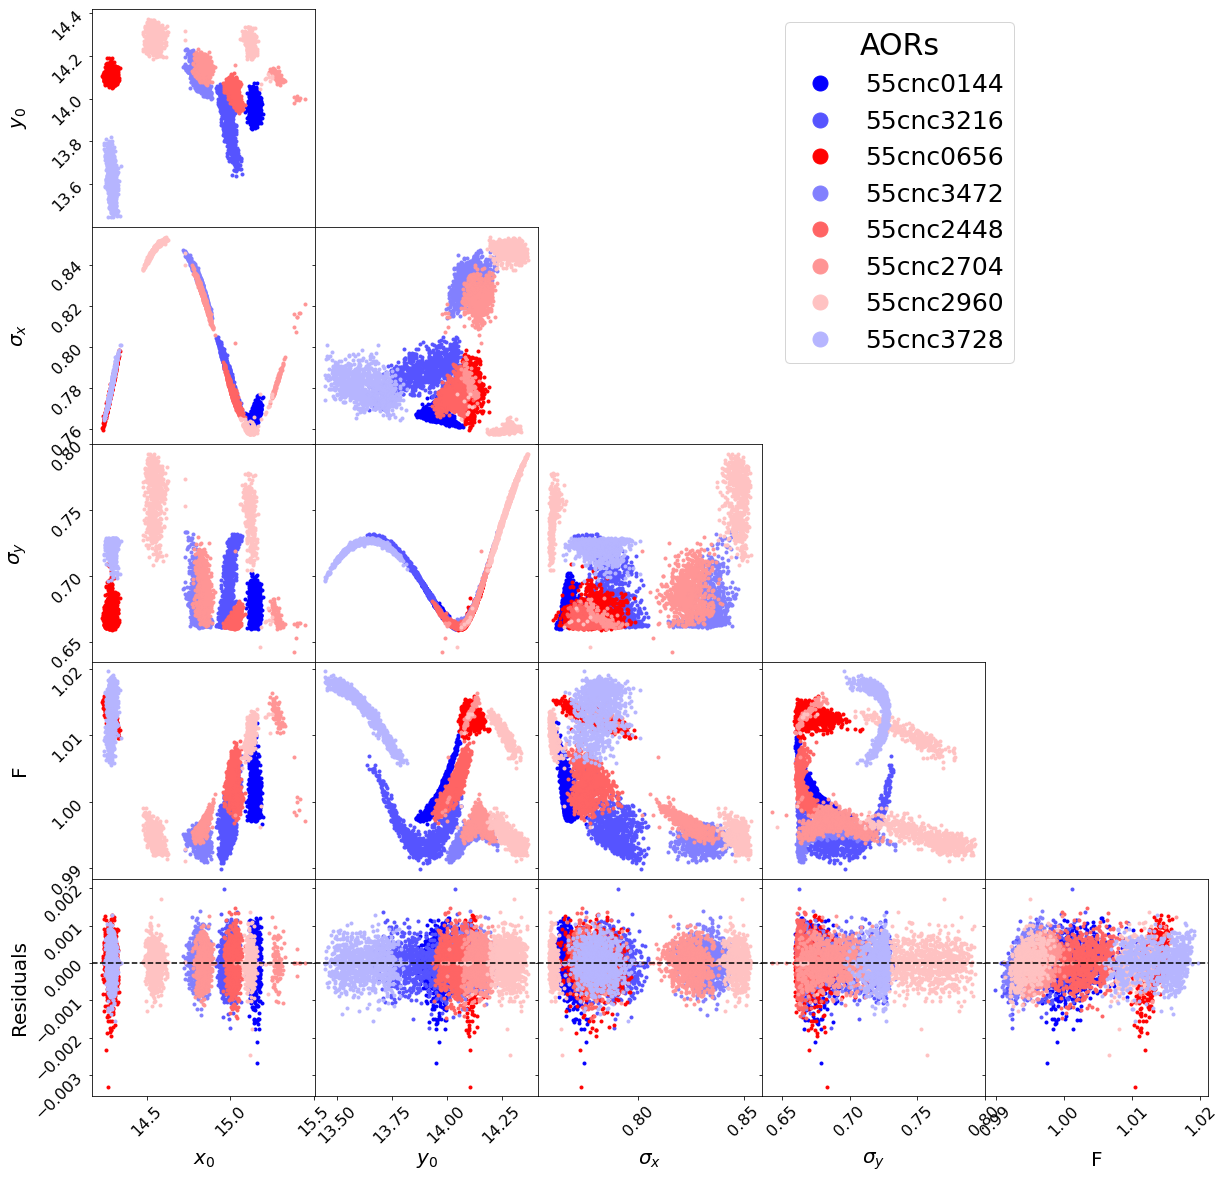

In [105]:
datamult = newimport('55cnc_Nobug', 'BLISS_v1,psfw_BETTER_PRIORS')
actualflux = datamult[2]
reducedflux = datamult[2]/datamult[4]
actualtime=datamult[1]
actualresiduals= reducedflux - datamult[3]


AOR1a=[]
AOR1res=[]
AOR2a=[]
AOR2res=[]
AOR3a=[]
AOR3res=[]
AOR4a=[]
AOR4res=[]
AOR5a=[]
AOR5res=[]
AOR6a=[]
AOR6res=[]
AOR7a=[]
AOR7res=[]
AOR8a=[]
AOR8res=[]
for i in range(len(actualflux)):
    if actualtime[i] < 56460:
        AOR1a.append(actualflux[i])
        AOR1res.append(actualresiduals[i])
    elif 56460 < actualtime[i] < 56463 : 
        AOR2a.append(actualflux[i])
        AOR2res.append(actualresiduals[i])
    elif 56464 < actualtime[i] < 56466 : 
        AOR3a.append(actualflux[i])
        AOR3res.append(actualresiduals[i])
    elif 56470 < actualtime[i] < 56475 : 
        AOR4a.append(actualflux[i])
        AOR4res.append(actualresiduals[i])
    elif 56475 < actualtime[i] < 56480 : 
        AOR5a.append(actualflux[i])
        AOR5res.append(actualresiduals[i])
    elif 56480 < actualtime[i] < 56484 : 
        AOR6a.append(actualflux[i])
        AOR6res.append(actualresiduals[i])
    elif 56484 <= actualtime[i] < 56487 : 
        AOR7a.append(actualflux[i])
        AOR7res.append(actualresiduals[i])
    elif 56488 < actualtime[i] < 56492 : 
        AOR8a.append(actualflux[i])
        AOR8res.append(actualresiduals[i])

def makestuff(aor):
    time=aor[:, 2]
    xdata=aor[:, 4]
    ydata=aor[:, 6]
    psfwx=aor[:, 8]
    psfwy=aor[:, 10]
    return time, xdata, ydata, psfwx, psfwy

def collectallthedata(aorname, ac, res):
    aorn=np.loadtxt('/Users/samsonmercier/Desktop/Research/'+aorname+'/4umExactCircular2_2_movingCentroid/ch2_datacube_binned_AORs4807.dat', dtype=float, skiprows=1)
    aornt, aornx, aorny, aornpsfxw, aornpsfyw = makestuff(aorn)
    aornresiduals=res
    aornflux=ac
    return aornt, aornflux, aornx, aorny, aornpsfxw, aornpsfyw, aornresiduals

aor1t, aor1flux, aor1x, aor1y, aor1psfxw, aor1psfyw, aor1residuals=collectallthedata('55cnc0144', AOR1a, AOR1res)
aor2t, aor2flux, aor2x, aor2y, aor2psfxw, aor2psfyw, aor2residuals=collectallthedata('55cnc3216', AOR2a, AOR2res)
aor3t, aor3flux, aor3x, aor3y, aor3psfxw, aor3psfyw, aor3residuals=collectallthedata('55cnc0656', AOR3a, AOR3res)
aor4t, aor4flux, aor4x, aor4y, aor4psfxw, aor4psfyw, aor4residuals=collectallthedata('55cnc3472', AOR4a, AOR4res)
aor5t, aor5flux, aor5x, aor5y, aor5psfxw, aor5psfyw, aor5residuals=collectallthedata('55cnc2448', AOR5a, AOR5res)
aor6t, aor6flux, aor6x, aor6y, aor6psfxw, aor6psfyw, aor6residuals=collectallthedata('55cnc2704', AOR6a, AOR6res)
aor7t, aor7flux, aor7x, aor7y, aor7psfxw, aor7psfyw, aor7residuals=collectallthedata('55cnc2960', AOR7a, AOR7res)
aor8t, aor8flux, aor8x, aor8y, aor8psfxw, aor8psfyw, aor8residuals=collectallthedata('55cnc3728', AOR8a, AOR8res)

#plt.legend(title='AORs', bbox_to_anchor=(1.05, 1), loc='upper left')

from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator, ScalarFormatter
import matplotlib.pyplot as plt
fig=plt.figure(figsize = (20,20))
axs=[]
gs  = gridspec.GridSpec(5, 5)
ax1 = fig.add_subplot(gs[0, 0])
axs.append(ax1)
ax1.plot(aor1x, aor1y, '.', color = colors[0], label='55cnc0144')
ax1.plot(aor2x, aor2y, '.', color = colors[1], label='55cnc3216')
ax1.plot(aor3x, aor3y, '.', color = colors[2], label='55cnc0656')
ax1.plot(aor4x, aor4y, '.', color = colors[3], label='55cnc3472')
ax1.plot(aor5x, aor5y, '.', color = colors[4], label='55cnc2448')
ax1.plot(aor6x, aor6y, '.', color = colors[5], label='55cnc2704')
ax1.plot(aor7x, aor7y, '.', color = colors[6], label='55cnc2960')
ax1.plot(aor8x, aor8y, '.', color = colors[7], label='55cnc3728')
ax1.legend(title='AORs', bbox_to_anchor=(3.05, 1), loc='upper left', title_fontsize=30, fontsize=25, markerscale=5.0)
ax1.set_ylabel('$y_0$', fontsize=20)
plt.setp(ax1.get_yticklabels(), rotation = 45)
ax2 = fig.add_subplot(gs[1, 0])
axs.append(ax2)
ax2.plot(aor1x, aor1psfxw, '.', color = colors[0])
ax2.plot(aor2x, aor2psfxw, '.', color = colors[1])
ax2.plot(aor3x, aor3psfxw, '.', color = colors[2])
ax2.plot(aor4x, aor4psfxw, '.', color = colors[3])
ax2.plot(aor5x, aor5psfxw, '.', color = colors[4])
ax2.plot(aor6x, aor6psfxw, '.', color = colors[5])
ax2.plot(aor7x, aor7psfxw, '.', color = colors[6])
ax2.plot(aor8x, aor8psfxw, '.', color = colors[7])
ax2.set_ylabel('$\sigma_x$', fontsize=20)
plt.setp(ax2.get_yticklabels(), rotation = 45)
ax3=fig.add_subplot(gs[2, 0])
axs.append(ax3)
ax3.plot(aor1x, aor1psfyw, '.', color = colors[0])
ax3.plot(aor2x, aor2psfyw, '.', color = colors[1])
ax3.plot(aor3x, aor3psfyw, '.', color = colors[2])
ax3.plot(aor4x, aor4psfyw, '.', color = colors[3])
ax3.plot(aor5x, aor5psfyw, '.', color = colors[4])
ax3.plot(aor6x, aor6psfyw, '.', color = colors[5])
ax3.plot(aor7x, aor7psfyw, '.', color = colors[6])
ax3.plot(aor8x, aor8psfyw, '.', color = colors[7])
ax3.set_ylabel('$\sigma_y$', fontsize=20)
plt.setp(ax3.get_yticklabels(), rotation = 45)
ax4=fig.add_subplot(gs[3, 0])
axs.append(ax4)
ax4.plot(aor1x, aor1flux, '.', color = colors[0])
ax4.plot(aor2x, aor2flux, '.', color = colors[1])
ax4.plot(aor3x, aor3flux, '.', color = colors[2])
ax4.plot(aor4x, aor4flux, '.', color = colors[3])
ax4.plot(aor5x, aor5flux, '.', color = colors[4])
ax4.plot(aor6x, aor6flux, '.', color = colors[5])
ax4.plot(aor7x, aor7flux, '.', color = colors[6])
ax4.plot(aor8x, aor8flux, '.', color = colors[7])
ax4.set_ylabel('F', fontsize=20)
plt.setp(ax4.get_yticklabels(), rotation = 45)
ax5=fig.add_subplot(gs[4, 0])
axs.append(ax5)
ax5.plot(aor1x, aor1residuals, '.', color = colors[0])
ax5.plot(aor2x, aor2residuals, '.', color = colors[1])
ax5.plot(aor3x, aor3residuals, '.', color = colors[2])
ax5.plot(aor4x, aor4residuals, '.', color = colors[3])
ax5.plot(aor5x, aor5residuals, '.', color = colors[4])
ax5.plot(aor6x, aor6residuals, '.', color = colors[5])
ax5.plot(aor7x, aor7residuals, '.', color = colors[6])
ax5.plot(aor8x, aor8residuals, '.', color = colors[7])
ax5.set_ylabel('Residuals', fontsize=20)
ax5.axhline(y=0, color='k', linestyle='dashed')
ax5.set_xlabel('$x_0$', fontsize=20)
plt.setp(ax5.get_xticklabels(), rotation = 45)
plt.setp(ax5.get_yticklabels(), rotation = 45)
ax6=fig.add_subplot(gs[1, 1])
axs.append(ax6)
ax6.plot(aor1y, aor1psfxw, '.', color = colors[0])
ax6.plot(aor2y, aor2psfxw, '.', color = colors[1])
ax6.plot(aor3y, aor3psfxw, '.', color = colors[2])
ax6.plot(aor4y, aor4psfxw, '.', color = colors[3])
ax6.plot(aor5y, aor5psfxw, '.', color = colors[4])
ax6.plot(aor6y, aor6psfxw, '.', color = colors[5])
ax6.plot(aor7y, aor7psfxw, '.', color = colors[6])
ax6.plot(aor8y, aor8psfxw, '.', color = colors[7])
plt.setp(ax6.get_yticklabels(), visible=False)
ax7=fig.add_subplot(gs[2, 1])
axs.append(ax7)
ax7.plot(aor1y, aor1psfyw, '.', color = colors[0])
ax7.plot(aor2y, aor2psfyw, '.', color = colors[1])
ax7.plot(aor3y, aor3psfyw, '.', color = colors[2])
ax7.plot(aor4y, aor4psfyw, '.', color = colors[3])
ax7.plot(aor5y, aor5psfyw, '.', color = colors[4])
ax7.plot(aor6y, aor6psfyw, '.', color = colors[5])
ax7.plot(aor7y, aor7psfyw, '.', color = colors[6])
ax7.plot(aor8y, aor8psfyw, '.', color = colors[7])
plt.setp(ax7.get_yticklabels(), visible=False)
ax8=fig.add_subplot(gs[3, 1])
axs.append(ax8)
ax8.plot(aor1y, aor1flux, '.', color = colors[0])
ax8.plot(aor2y, aor2flux, '.', color = colors[1])
ax8.plot(aor3y, aor3flux, '.', color = colors[2])
ax8.plot(aor4y, aor4flux, '.', color = colors[3])
ax8.plot(aor5y, aor5flux, '.', color = colors[4])
ax8.plot(aor6y, aor6flux, '.', color = colors[5])
ax8.plot(aor7y, aor7flux, '.', color = colors[6])
ax8.plot(aor8y, aor8flux, '.', color = colors[7])
plt.setp(ax8.get_yticklabels(), visible=False)
ax9=fig.add_subplot(gs[4, 1])
axs.append(ax9)
ax9.plot(aor1y, aor1residuals, '.', color = colors[0])
ax9.plot(aor2y, aor2residuals, '.', color = colors[1])
ax9.plot(aor3y, aor3residuals, '.', color = colors[2])
ax9.plot(aor4y, aor4residuals, '.', color = colors[3])
ax9.plot(aor5y, aor5residuals, '.', color = colors[4])
ax9.plot(aor6y, aor6residuals, '.', color = colors[5])
ax9.plot(aor7y, aor7residuals, '.', color = colors[6])
ax9.plot(aor8y, aor8residuals, '.', color = colors[7])
ax9.axhline(y=0, color='k', linestyle='dashed')
ax9.set_xlabel('$y_0$', fontsize=20)
ax9.xaxis.set_major_locator(MaxNLocator(5, prune = 'both'))
plt.setp(ax9.get_xticklabels(), rotation = 45)
plt.setp(ax9.get_yticklabels(), visible=False)

ax10=fig.add_subplot(gs[2, 2])
axs.append(ax10)
ax10.plot(aor1psfxw, aor1psfyw, '.', color = colors[0])
ax10.plot(aor2psfxw, aor2psfyw, '.', color = colors[1])
ax10.plot(aor3psfxw, aor3psfyw, '.', color = colors[2])
ax10.plot(aor4psfxw, aor4psfyw, '.', color = colors[3])
ax10.plot(aor5psfxw, aor5psfyw, '.', color = colors[4])
ax10.plot(aor6psfxw, aor6psfyw, '.', color = colors[5])
ax10.plot(aor7psfxw, aor7psfyw, '.', color = colors[6])
ax10.plot(aor8psfxw, aor8psfyw, '.', color = colors[7])
plt.setp(ax10.get_yticklabels(), visible=False)
ax11=fig.add_subplot(gs[3, 2])
axs.append(ax11)
ax11.plot(aor1psfxw, aor1flux, '.', color = colors[0])
ax11.plot(aor2psfxw, aor2flux, '.', color = colors[1])
ax11.plot(aor3psfxw, aor3flux, '.', color = colors[2])
ax11.plot(aor4psfxw, aor4flux, '.', color = colors[3])
ax11.plot(aor5psfxw, aor5flux, '.', color = colors[4])
ax11.plot(aor6psfxw, aor6flux, '.', color = colors[5])
ax11.plot(aor7psfxw, aor7flux, '.', color = colors[6])
ax11.plot(aor8psfxw, aor8flux, '.', color = colors[7])
plt.setp(ax11.get_yticklabels(), visible=False)
ax12=fig.add_subplot(gs[4, 2])
axs.append(ax12)
ax12.plot(aor1psfxw, aor1residuals, '.', color = colors[0])
ax12.plot(aor2psfxw, aor2residuals, '.', color = colors[1])
ax12.plot(aor3psfxw, aor3residuals, '.', color = colors[2])
ax12.plot(aor4psfxw, aor4residuals, '.', color = colors[3])
ax12.plot(aor5psfxw, aor5residuals, '.', color = colors[4])
ax12.plot(aor6psfxw, aor6residuals, '.', color = colors[5])
ax12.plot(aor7psfxw, aor7residuals, '.', color = colors[6])
ax12.plot(aor8psfxw, aor8residuals, '.', color = colors[7])
ax12.axhline(y=0, color='k', linestyle='dashed')
ax12.set_xlabel('$\sigma_x$', fontsize=20)
plt.setp(ax12.get_xticklabels(), rotation = 45)
plt.setp(ax12.get_yticklabels(), visible=False)
ax13=fig.add_subplot(gs[3, 3])
axs.append(ax13)
ax13.plot(aor1psfyw, aor1flux, '.', color = colors[0])
ax13.plot(aor2psfyw, aor2flux, '.', color = colors[1])
ax13.plot(aor3psfyw, aor3flux, '.', color = colors[2])
ax13.plot(aor4psfyw, aor4flux, '.', color = colors[3])
ax13.plot(aor5psfyw, aor5flux, '.', color = colors[4])
ax13.plot(aor6psfyw, aor6flux, '.', color = colors[5])
ax13.plot(aor7psfyw, aor7flux, '.', color = colors[6])
ax13.plot(aor8psfyw, aor8flux, '.', color = colors[7])
plt.setp(ax13.get_yticklabels(), visible=False)
ax14=fig.add_subplot(gs[4, 3])
axs.append(ax14)
ax14.plot(aor1psfyw, aor1residuals, '.', color = colors[0])
ax14.plot(aor2psfyw, aor2residuals, '.', color = colors[1])
ax14.plot(aor3psfyw, aor3residuals, '.', color = colors[2])
ax14.plot(aor4psfyw, aor4residuals, '.', color = colors[3])
ax14.plot(aor5psfyw, aor5residuals, '.', color = colors[4])
ax14.plot(aor6psfyw, aor6residuals, '.', color = colors[5])
ax14.plot(aor7psfyw, aor7residuals, '.', color = colors[6])
ax14.plot(aor8psfyw, aor8residuals, '.', color = colors[7])
ax14.axhline(y=0, color='k', linestyle='dashed')
ax14.set_xlabel('$\sigma_y$', fontsize=20)
plt.setp(ax14.get_xticklabels(), rotation = 45)
plt.setp(ax14.get_yticklabels(), visible=False)
ax15=fig.add_subplot(gs[4, 4])
axs.append(ax15)
ax15.plot(aor1flux, aor1residuals, '.', color = colors[0])
ax15.plot(aor2flux, aor2residuals, '.', color = colors[1])
ax15.plot(aor3flux, aor3residuals, '.', color = colors[2])
ax15.plot(aor4flux, aor4residuals, '.', color = colors[3])
ax15.plot(aor5flux, aor5residuals, '.', color = colors[4])
ax15.plot(aor6flux, aor6residuals, '.', color = colors[5])
ax15.plot(aor7flux, aor7residuals, '.', color = colors[6])
ax15.plot(aor8flux, aor8residuals, '.', color = colors[7])
ax15.axhline(y=0, color='k', linestyle='dashed')
ax15.set_xlabel('F', fontsize=20)
plt.setp(ax15.get_xticklabels(), rotation = 45)
plt.setp(ax15.get_yticklabels(), visible=False)
fig.subplots_adjust(hspace=0)
fig.subplots_adjust(wspace=0)
fig.align_ylabels(axs)
fig.align_xlabels(axs)
for i in range(len(axs)):
    axs[i].xaxis.set_tick_params(labelsize=20*0.8)
    axs[i].yaxis.set_tick_params(labelsize=20*0.8)

#plt.savefig('/Users/samsonmercier/Desktop/cornerplot.pdf')

# Sanity check - Correlation plot

In [ ]:
datamult = newimport('55cnc_Nobug', 'BLISS_v1,psfw')

actualflux = datamult[2]/datamult[4]
actualtime = datamult[1]

AOR1a=[]
AOR2a=[]
AOR3a=[]
AOR4a=[]
AOR5a=[]
AOR6a=[]
AOR7a=[]
AOR8a=[]

for i in range(len(actualflux)):
    if actualtime[i] < 56460:
        AOR1a.append(actualflux[i])
    elif 56460 < actualtime[i] < 56463 : 
        AOR2a.append(actualflux[i])
    elif 56464 < actualtime[i] < 56466 : 
        AOR3a.append(actualflux[i])
    elif 56470 < actualtime[i] < 56475 : 
        AOR4a.append(actualflux[i])
    elif 56475 < actualtime[i] < 56480 : 
        AOR5a.append(actualflux[i])
    elif 56480 < actualtime[i] < 56484 : 
        AOR6a.append(actualflux[i])
    elif 56484 <= actualtime[i] < 56487 : 
        AOR7a.append(actualflux[i])
    elif 56488 < actualtime[i] < 56492 : 
        AOR8a.append(actualflux[i])

## Download Demory corrected photometry

In [137]:
file = Path('/Users/samsonmercier/Desktop/Research/Sanity_checks', 'Fig4.xlsx')
obj = openpyxl.load_workbook(file)

sheet = obj.active

Demory_time = []
Demory_corr_flux = []
for row in sheet.iter_rows(1, sheet.max_row):
    Demory_time.append(row[0].value)
    Demory_corr_flux.append(row[2].value)

Demory_time = Demory_time[1:]
Demory_corr_flux = Demory_corr_flux[1:]

lim1 = 1028
lim2 = 2052

Demory_time_0144 = Demory_time[:lim1]
Demory_corr_flux_0144 = Demory_corr_flux[:lim1]

Demory_time_3216 = Demory_time[lim1:lim2]
Demory_corr_flux_3216 = Demory_corr_flux[lim1:lim2]

Demory_time_0656 = Demory_time[lim2:]
Demory_corr_flux_0656 = Demory_corr_flux[lim2:]

/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [138]:
file = Path('/Users/samsonmercier/Desktop/Research/Sanity_checks', 'Fig5.xlsx')
obj = openpyxl.load_workbook(file)

sheet = obj.active

Demory_time = []
Demory_corr_flux = []
for row in sheet.iter_rows(1, sheet.max_row):
    Demory_time.append(row[0].value)
    Demory_corr_flux.append(row[2].value)

Demory_time = Demory_time[1:]
Demory_corr_flux = Demory_corr_flux[1:]

lim1 = 1017
lim2 = 2045

Demory_time_3472 = Demory_time[:lim1]
Demory_corr_flux_3472 = Demory_corr_flux[:lim1]

Demory_time_2448 = Demory_time[lim1:lim2]
Demory_corr_flux_2448 = Demory_corr_flux[lim1:lim2]

Demory_time_2704 = Demory_time[lim2:]
Demory_corr_flux_2704 = Demory_corr_flux[lim2:]

In [139]:
file = Path('/Users/samsonmercier/Desktop/Research/Sanity_checks', 'Fig6.xlsx')
obj = openpyxl.load_workbook(file)

sheet = obj.active

Demory_time = []
Demory_corr_flux = []
for row in sheet.iter_rows(1, sheet.max_row):
    Demory_time.append(row[0].value)
    Demory_corr_flux.append(row[2].value)

Demory_time = Demory_time[1:]
Demory_corr_flux = Demory_corr_flux[1:]

lim1 = 337
lim2 = 1057

Demory_time_2960_1 = Demory_time[:lim1]
Demory_corr_flux_2960_1 = Demory_corr_flux[:lim1]

Demory_time_2960_2 = Demory_time[lim1:lim2]
Demory_corr_flux_2960_2 = Demory_corr_flux[lim1:lim2]

Demory_time_2960 = Demory_time_2960_1+Demory_time_2960_2
Demory_corr_flux_2960 = Demory_corr_flux_2960_1+Demory_corr_flux_2960_2

Demory_time_3728 = Demory_time[lim2:]
Demory_corr_flux_3728 = Demory_corr_flux[lim2:]

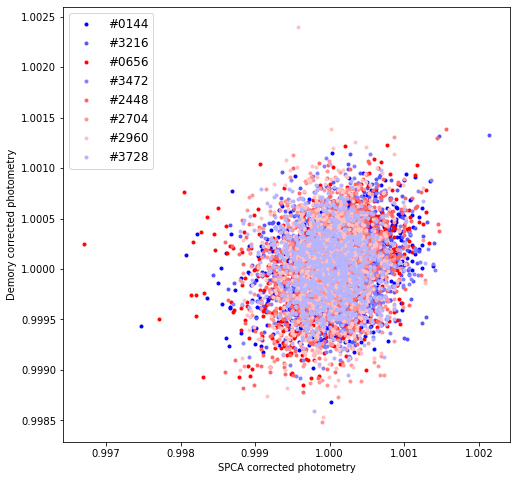

In [146]:
plt.figure(figsize=(8, 8))
plt.plot(Bindata(AOR1a, 0.905)[0], Demory_corr_flux_0144, '.', color=colors[0], label='#0144')
plt.plot(Bindata(AOR2a, 0.909)[0], Demory_corr_flux_3216, '.', color=colors[1], label='#3216')
plt.plot(Bindata(AOR3a, 0.913)[0], Demory_corr_flux_0656, '.', color=colors[2], label='#0656')
plt.plot(Bindata(AOR4a, 0.915)[0], Demory_corr_flux_3472, '.', color=colors[3], label='#3472')
plt.plot(Bindata(AOR5a, 0.905)[0], Demory_corr_flux_2448, '.', color=colors[4], label='#2448')
plt.plot(Bindata(AOR6a, 0.953)[0], Demory_corr_flux_2704, '.', color=colors[5], label='#2704')
plt.plot(Bindata(AOR6a, 0.88)[0], Demory_corr_flux_2960, '.', color=colors[6], label='#2960')
plt.plot(Bindata(AOR6a, 0.988)[0], Demory_corr_flux_3728, '.', color=colors[7], label='#3728')
plt.xlabel('SPCA corrected photometry')
plt.ylabel('Demory corrected photometry')
plt.legend(loc='upper left', fontsize=12)

plt.savefig('/Users/samsonmercier/Desktop/Correlation.pdf')

# Miscalleneous tests

In [150]:
Aval = 0.5550103462215551
Bval = 0.019557827990232673
phis = np.linspace(-np.pi,np.pi,1000)
PhaseMod = 1 + Aval*(np.cos(phis)-1) + Bval*np.sin(phis)
offset = -phis[np.argmax(PhaseMod)]*180/np.pi
print(offset)

-1.9819819819819582


['checkPhasePhis', 'A', 'B', 'C', 'D']
-inf


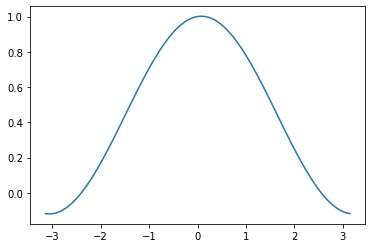

In [30]:
import inspect 
def check_phase(checkPhasePhis, A, B, C=0, D=0):
    """Check if the phasecurve ever dips below zero, implying non-physical negative flux coming from the planet.

    Args:
        phis (ndarray): Array of phases in radians at which to calculate the model, e.g. phis=np.linspace(-np.pi,np.pi,1000).
        A (float): Amplitude of the first-order cosine term.
        B (float): Amplitude of the first-order sine term.
        C (float, optional): Amplitude of the second-order cosine term. Default=0.
        D (float, optional): Amplitude of the second-order sine term. Default=0.

    Returns:
        bool: True if lightcurve implies non-physical negative flux coming from the planet, False otherwise.
    
    """
    toggle = True
    if toggle:
        if not (-90 < np.arctan2(B, A)*180/np.pi < 90):
            return -np.inf
    
        if C==0 and D==0:
            #avoid wasting time by multiplying by a bunch of zeros
            negative = np.any(1 + A*(np.cos(checkPhasePhis)-1) + B*np.sin(checkPhasePhis) < 0)
        else: 
            negative =  np.any(1 + A*(np.cos(checkPhasePhis)-1) + B*np.sin(checkPhasePhis)
                            + C*(np.cos(2*checkPhasePhis)-1) + D*np.sin(2*checkPhasePhis) < 0)
        
        if negative:
            return -np.inf
        else:
            return 0
    else:
        return 0

full_args  = inspect.getfullargspec(check_phase).args
print(full_args)

checkPhase = np.linspace(-np.pi, np.pi, 100)
Av = 0.5589036761276133
Bv = 0.04258309622951063
plt.plot(checkPhase, 1 + Av*(np.cos(checkPhase)-1) + Bv*np.sin(checkPhase))
print(check_phase(checkPhase, Av, Bv))